In [384]:
!pip install -U fortran-magic

%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import math
import py_compile
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

Requirement already up-to-date: fortran-magic in /usr/local/lib/python3.7/dist-packages (0.7)
The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

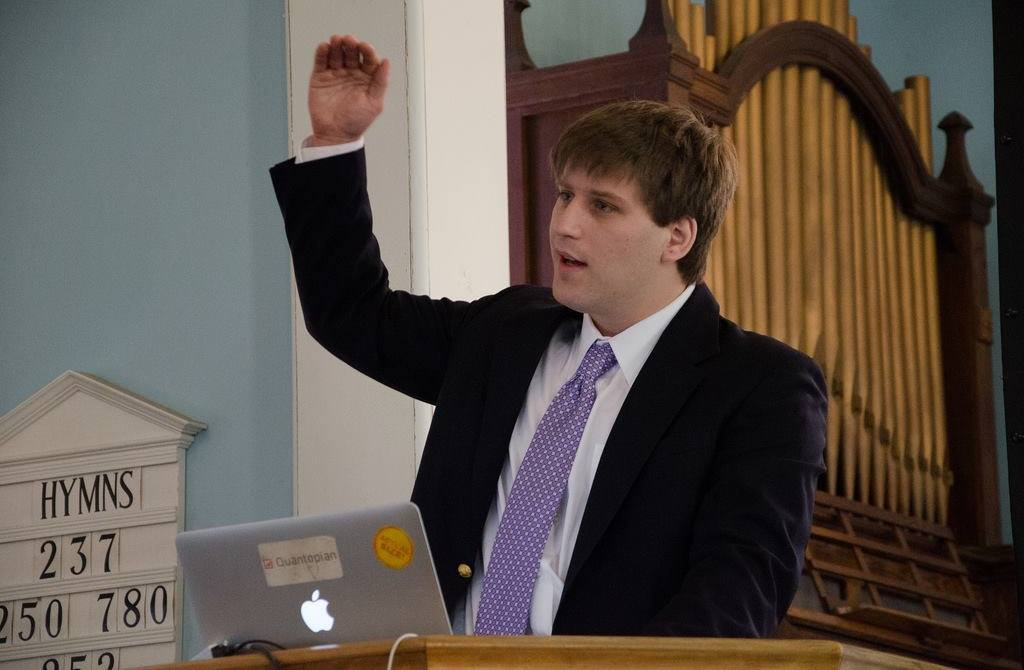

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [385]:
assert ran_the_first_cell, "Oh noes!"

In [386]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [387]:
l = [1, 'two', 3.0, 4, 5.0, "six"]

In [388]:
#My example of a list
months = ['January', 'Feb', 'March', 4, 'May', 'June', 7, 'Aug', 'Septembrer', 'October', 'Nov',12]
months

['January',
 'Feb',
 'March',
 4,
 'May',
 'June',
 7,
 'Aug',
 'Septembrer',
 'October',
 'Nov',
 12]

In [389]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [390]:
# My Example
fifth = months[4]
last = months[len(months)-1]
print("Fifth:", fifth)
print("Last:", last)

Fifth: May
Last: 12


In [391]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [392]:
# My Example
antepenultimate = months[-3]
first = months[-len(months)]
print("Third to last:", antepenultimate)
print("First item:", first)

Third to last: October
First item: January


In [393]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [394]:
#My example of an slice of the year (Summer!)
summer = months[4:8]
summer

['May', 'June', 7, 'Aug']

In [395]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [396]:
#My example
first_semester = months[:5]
first_semester

['January', 'Feb', 'March', 4, 'May']

In [397]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [398]:
#My example
last_trimester = months[9:]
last_trimester

['October', 'Nov', 12]

In [399]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [400]:
#My example (Months before Aug that have 31 days)
months[0:7:2]


['January', 'March', 'May', 7]

In [401]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [402]:
#My example, months reversed
months[::-1]

[12,
 'Nov',
 'October',
 'Septembrer',
 'Aug',
 7,
 'June',
 'May',
 4,
 'March',
 'Feb',
 'January']

In [403]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [404]:
# Adding a new item to our months list
print("Months before:", months)
months.append('January, Again')
print("Months after:", months)

Months before: ['January', 'Feb', 'March', 4, 'May', 'June', 7, 'Aug', 'Septembrer', 'October', 'Nov', 12]
Months after: ['January', 'Feb', 'March', 4, 'May', 'June', 7, 'Aug', 'Septembrer', 'October', 'Nov', 12, 'January, Again']


In [405]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [406]:
#My_example
l_2 = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
[x /2 for x in l_2]

[1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [407]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [408]:
#My example of dictionary, mathematical constants
constants = { "Pi" : 	 3.14159, 
              "Euler" :  2.71828 ,
              "Apery" : 1.20206,
              "Golden Ratio": 1.61803,
              "Khinchin":   2.68545}
constants

{'Apery': 1.20206,
 'Euler': 2.71828,
 'Golden Ratio': 1.61803,
 'Khinchin': 2.68545,
 'Pi': 3.14159}

In [409]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [410]:
#My example, adding yet another constant
constants['Sqrt of 2'] = 1.41421
constants

{'Apery': 1.20206,
 'Euler': 2.71828,
 'Golden Ratio': 1.61803,
 'Khinchin': 2.68545,
 'Pi': 3.14159,
 'Sqrt of 2': 1.41421}

In [411]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [412]:
#My example of deleting an item, Khinchin constant
del constants['Khinchin']
constants

{'Apery': 1.20206,
 'Euler': 2.71828,
 'Golden Ratio': 1.61803,
 'Pi': 3.14159,
 'Sqrt of 2': 1.41421}

In [413]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

In [ ]:
#My example
constants['Pi':'Golden Ratio']

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
#My example of matrices
c = [[0, 2, 4, 6, 8, 10 ,12],
     [1, 3, 5, 7, 9, 11, 13]]
    

d = [[1, 1],
     [2, 4],
     [3, 9],
     [4, 16],
     [5, 25],
     [6, 26],
     [7, 49]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [ ]:
%%time

matmul(a, b)

In [ ]:
#My example
%%time
matmul(c, d)

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

In [ ]:
#My example, genereating a 5X4 random matrix
randm_2 = random_matrix(5, 4)
randm_2

In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

In [ ]:
#My example, with a bigger matrix
%%time
randa_2 = random_matrix(1000, 1000)
randb_2 = random_matrix(1000, 1000)
x = matmul(randa_2, randb_2)

In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
#My example, another list of data
list_data_2 = [float(i) for i in range(1000000,2000000)]
array_data_2 = np.array(list_data_2)

In [ ]:
%%time
python_dot_product(list_data, list_data)

In [ ]:
#My example, dot product with python
%%time
python_dot_product(list_data_2, list_data_2)

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

In [ ]:
#My example, dot product with fortran
%%time
fortran_dot_product(array_data_2, array_data_2)

## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

In [ ]:
#My exmaple, multiplying different datatypes
mul_elemwise([True, 2 + 0j, 3, 'four'] ,[ 14, False ,'hi', 4])

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

In [ ]:
#My example
source_code = 'True + b * 14.0 + c/2'
bytecode = compile(source_code, '', 'eval')
dis.dis(bytecode)

## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

In [ ]:
#My example, numpy array
data_2 = np.array([3.5,0,3,-45,7.5,6/2])
data_2

In [ ]:
data + data

In [ ]:
#My example
(data_2*85)/2 + data_2

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

In [ ]:
%%time
# Naive dot product over my example arry
(array_data_2 * array_data_2).sum()

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

In [ ]:
%%time
# Built-in dot product over my example array
array_data_2.dot(array_data_2)

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

In [ ]:
#My example of writting a string into a float array
data_2[0] = "Zero"

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
#My example of attempting to regrow a numpy array
data_2.append(23)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

In [ ]:
#My example, giving the array a 3X2 shape
three_by_two = data_2.reshape(3, 2)
three_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

In [ ]:
#My example, now with an array of complex numbers
arr_2 = np.array([-1,14, 0.0, 4 + 0.j, -1.j, 8/2, 45, -5.j], dtype='complex').reshape(4, 2)
print("Array:\n", arr_2, sep='')
print("===========")
print("It's data type:", arr_2.dtype)
print("It's shape:", arr_2.shape)
print("It's strides:", arr_2.strides)
print("Data:", arr_2.data.tobytes())

# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

In [ ]:
#My example
data_2 = np.arange(start= 100, stop = 1700, step =50).reshape(8, 4)
data_2

In [ ]:
# Binary operators.
data * data

In [ ]:
#My example, binary operators (sum)
data_2-data_2

In [ ]:
# Unary functions.
np.sqrt(data)

In [ ]:
#My example, unary function
np.log(data_2)

In [ ]:
# Comparison operations
(data % 3) == 0

In [ ]:
# My example
(data_2 % 20) == 0  

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

In [ ]:
#My example
((data_2 < 900) & (data_2 >=300))

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

In [ ]:
#My example
data_2 @ data_2.T

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

In [ ]:
#My example, angles
pi = np.pi
angles = np.rad2deg(np.linspace(0,np.pi,10))
angles

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

In [ ]:
#My example
angles[9]

In [ ]:
sines[:3]  # First three elements  

In [ ]:
angles[:5] #My example, first 5 elements

In [ ]:
sines[5:]  # Elements from 5 on.

In [ ]:
angles[5:] #My example, last 5 elements

In [ ]:
sines[::2]  # Every other element.

In [ ]:
angles[::3] #My example, every 60 degrees

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

In [ ]:
#My example, angles that are greater than 90
print("angles:\n", angles)
print("angles > 90", angles > 90)
print("angles[angles > 90]:\n", angles[angles > 90])

In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

In [ ]:
#My example
print(angles)
angles[[0,3,9]]

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
#My example
unsorted_data_2 =np.array([-8, 7, 52, -7, 6 , 8, 98,- 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

In [ ]:
#My example, sorting indexes
sort_indices_2 = np.argsort(unsorted_data_2)
sort_indices_2

In [ ]:
unsorted_data[sort_indices]

In [ ]:
unsorted_data_2[sort_indices_2] # My example, now the data is sorted

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
#My example, for each item, there's aprice
prices= np.array([300, 200, 13, 15, 6, 17, 23])
items = np.array(['A','B','C','D','E','F','G'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

In [ ]:
#My example, sort the items by their prices
sort_by_prices = np.argsort(prices)
items[sort_by_prices]

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

In [ ]:
#My example
other_event_dates = pd.to_datetime(['2017-01-10', '2017-01-17', '2017-01-28']).values.astype('datetime64[D]')
print("Raw Dates:", other_event_dates)
print("Indices:", calendar.searchsorted(other_event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(other_event_dates)])

On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

In [ ]:
#My example
data_2 = np.arange(56).reshape(7, 8)
data_2

In [ ]:
data[:2, :2]  # First two rows and first two columns.

In [ ]:
data_2[3:6,3:6] #My example, rows in range 3-5, columns in range3-5

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

In [ ]:
data_2[:4,[0,4]] #My example, rows in range 0-3, first and fifth column

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

In [ ]:
#My example, rows where the first column is divisible by six and its greater than 0
data_2[((data_2[:, 0] % 6) == 0) & (data_2[:,0] >0)] 

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

My example: standar deviation:

$Std(X) = \sqrt{\frac{\sum_{i=1}^N (x_i - \bar{x})^2 }{N}}$

In [ ]:
#My example, standar deviation
def standar_deviation(x):
  return np.sqrt(((x - x.mean()) ** 2).sum() / len(x))

In [ ]:
#My example
standar_deviation(np.random.standard_normal(1000))


- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

In [ ]:
#My example
data_2 = np.arange(50)
data_2.sum()

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

In [ ]:
data.mean()

In [ ]:
data.mean(axis=0)

In [ ]:
data.mean(axis=1)

In [ ]:
#My example
data_2 =  np.arange(50).reshape(5, 10)
data_2

In [ ]:
#My example
data_2.sum()

In [ ]:
#My example, sum of columns
data_2.sum(axis=0)

In [ ]:
#My example, sum of rows
data_2.sum(axis=1)

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

In [ ]:
row + column

In [ ]:
#My example, a 11 items row, and a 4 item column
row_2 = np.array([0, 2, 4, 6, 8, 10, 12,14, 16, 18,20])
column_2= np.array([[1], [2], [3], [4]])
print("Row:\n", row_2, sep='')
print("Column:\n", column_2, sep='')

In [ ]:
#My example, results in a 11X4 matrix
row_2 + column_2

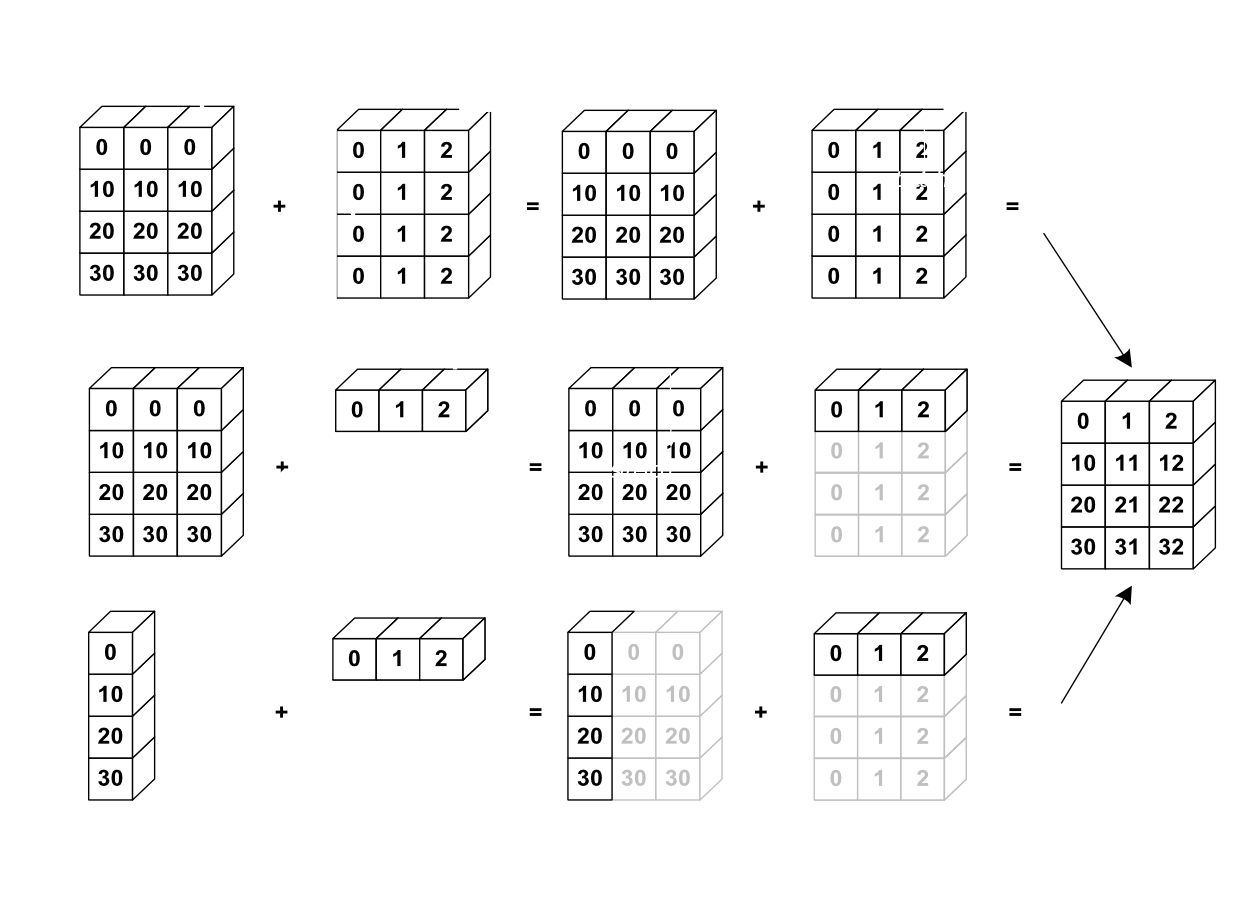

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

In [ ]:
#My example
print("My data:\n", data_2, sep='')
print("My mean:\n", data_2.mean(axis=0), sep='')
print("My data - Mean:\n", data_2 - data_2.mean(axis=0), sep='')

# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

In [ ]:
#My example
s_2 =pd.Series(index=['a', 'b', 'c', 'd', 'e','f','g','h'], data=[7.2, 2.5, -3.4, 4.4, 5, 4.001, 3.2, -2])
s_2

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

In [ ]:
#My example
print("The index is:", s_2.index)
print("The values are:", s_2.values)

In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

In [ ]:
#My example, looking up by position
s_2.iloc[6]

In [ ]:
# ... or by label.
s.loc['a']

In [ ]:
#My example, looking up by label
s_2.loc['g']

In [ ]:
# Slicing works as expected...
s.iloc[:2]

In [ ]:
#My example
s_2.iloc[2:6]

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

In [ ]:
#My example
s_2.loc['d':]

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

In [ ]:
#My example, third, fourth and last column
s_2.iloc[[2,3, 7]]

In [ ]:
# As does boolean masking.
s.loc[s > 2]

In [ ]:
#My example
s_2[s_2>3]

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

In [ ]:
s + other_s

In [ ]:
#My exampler, second series
other_s_2 = pd.Series({'d': 3.14, 'e': -1.4, 'f': 0, 'h': 6, 'i': 2.3, 'j':7})
other_s_2

In [ ]:
#My example, series substraction, if not defined in one column, substracion is going to be NaN
other_s_2 - s_2

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

In [ ]:
#My example, filling with 2
(other_s_2 - s_2).fillna(2.0)

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

In [ ]:
#My example
goog = pd.read_csv('GOOG.csv', parse_dates=['Date'], index_col='Date')
goog.head()

In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

In [ ]:
#My example
goog.iloc[30:35, 4:6]

In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

In [ ]:
#My example
goog.loc[pd.Timestamp('2014-06-01'):pd.Timestamp('2015-06-01'), ['High', 'Low']]

# Rolling Operations

<center><img src="images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

In [ ]:
#My example
goog.rolling(30)[['High', 'Low']].mean().plot();

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

In [ ]:
#My example, using the mean of eah week period
goog.drop('Volume', axis=1).resample('W').mean().plot();

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

In [ ]:
# My example of 30-day rolling exponentially-weighted stddev of returns.
goog['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [428]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

Date     Region  ... Low Price  High Price
0 2014-01-03 00:00:00+00:00   NATIONAL  ...       NaN         NaN
1 2014-01-03 00:00:00+00:00   NATIONAL  ...       NaN         NaN
2 2014-01-03 00:00:00+00:00  NORTHEAST  ...       0.5        1.67
3 2014-01-03 00:00:00+00:00  NORTHEAST  ...       1.5        2.00
4 2014-01-03 00:00:00+00:00  SOUTHEAST  ...       0.5        1.99

[5 rows x 8 columns]

In [427]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

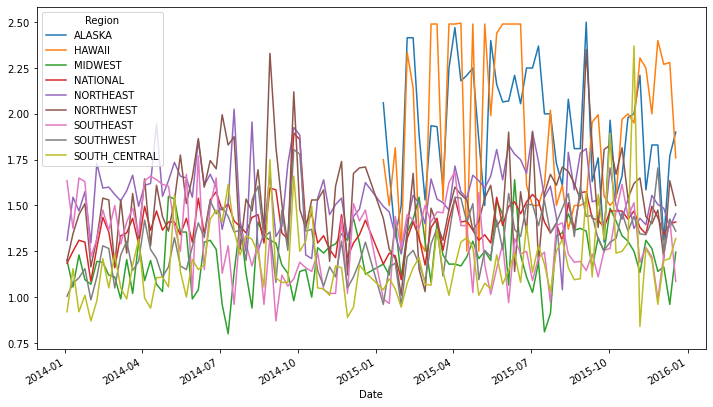

In [429]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [443]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

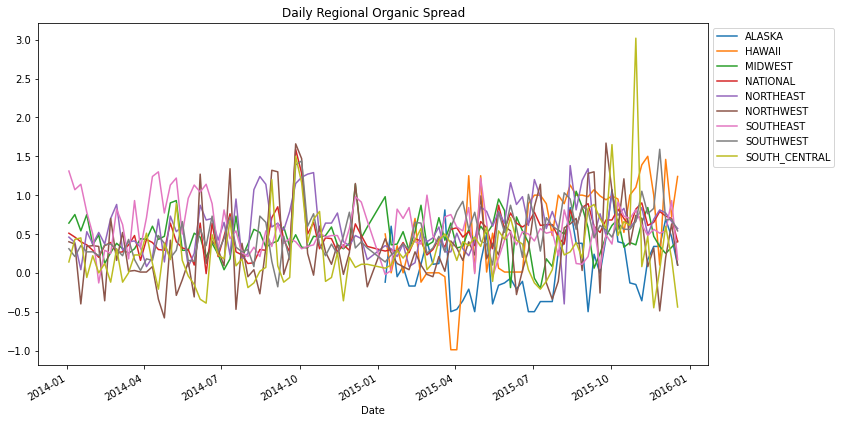

In [430]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [431]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region           ALASKA    HAWAII  ...  SOUTHWEST  SOUTH_CENTRAL
Region                             ...                          
ALASKA         1.000000  0.202723  ...  -0.070868       0.161624
HAWAII         0.202723  1.000000  ...   0.159192       0.092632
MIDWEST        0.175251 -0.021116  ...  -0.059128       0.068902
NATIONAL       0.007844  0.373914  ...   0.635006       0.486524
NORTHEAST      0.051049  0.247171  ...   0.360389       0.149881
NORTHWEST      0.087575  0.341155  ...   0.165992       0.349935
SOUTHEAST      0.129079  0.019388  ...  -0.167631      -0.021176
SOUTHWEST     -0.070868  0.159192  ...   1.000000       0.254504
SOUTH_CENTRAL  0.161624  0.092632  ...   0.254504       1.000000

[9 rows x 9 columns]

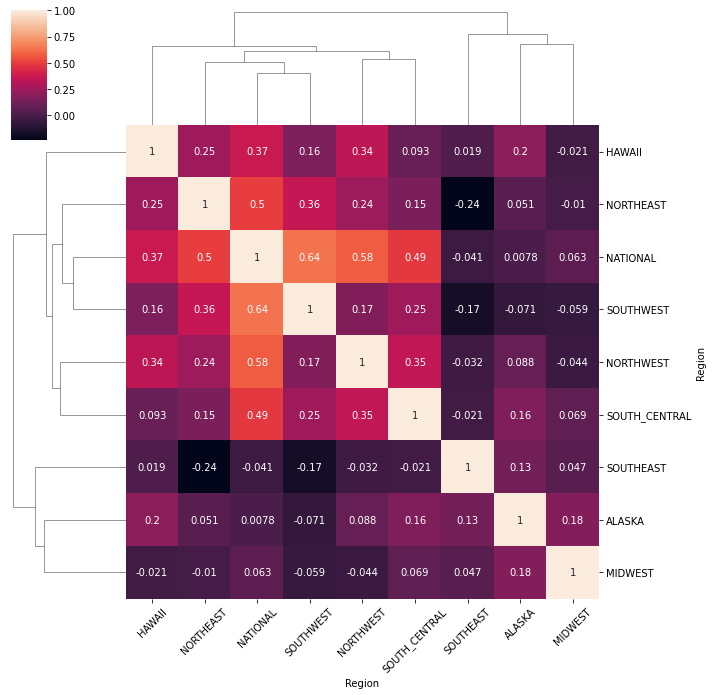

In [515]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#My analyisis

A dataset was downloaded from https://www.datos.gov.co/, which contains the international entries to the colombian territory since 2012. The data was downloaded as a `csv` file, and was uploaded to this project as a dataframe. However, there was no date column to be found, only `Year` and `Month`, so this information was used in order to make a column called `Mes Viaje`,which refers to a date with a monthly frecuency

In [489]:
dict ={ 'Enero':'01',
      'Febrero':"02",
      'Marzo':"03",
      'Abril':'04',
      'Mayo':'05',
      'Junio':'06',
      'Julio':'07',
      'Agosto':'08',
      'Septiembre':'09',
      'Octubre':'10',
      'Noviembre':'11',
      'Diciembre':'12'
}
w = lambda x: dict[x]
y = lambda x: str(x)

fields= ['A単o','Mes']
dates = pd.read_csv('EXT.csv', converters= {'Mes':w,'A単o':y}, usecols=fields)
dates = pd.to_datetime(dates['A単o']+ "-"+ dates['Mes']+"-01")
dates.name = 'Mes Viaje'

In [490]:
fields = ['Nacionalidad',	'Codigo Iso 3166',	'Femenino',	'Masculino',	'Indefinido',	'Total',	'Latitud - Longitud']
entries = pd.read_csv('EXT.csv', usecols=fields)
entries = pd.concat([dates,entries],axis=1)
entries.head()

Mes Viaje             Nacionalidad  ...  Total      Latitud - Longitud
0 2012-01-01  Islas Alboran y Perejil  ...      1   (4.697144,-74.140516)
1 2012-01-01                  Albania  ...      3   (4.697144,-74.140516)
2 2012-01-01                 Alemania  ...     27  (-4.197703,-69.941278)
3 2012-01-01                 Alemania  ...      2    (0.25129,-76.875963)
4 2012-01-01                 Alemania  ...    165   (0.814836,-77.662532)

[5 rows x 8 columns]

The data contains the following columns, each of which have the following data types:

In [491]:
entries.dtypes

Mes Viaje             datetime64[ns]
Nacionalidad                  object
Codigo Iso 3166                int64
Femenino                       int64
Masculino                      int64
Indefinido                   float64
Total                          int64
Latitud - Longitud            object
dtype: object

The following are the 9 countries that historically cumulated the most entries to the colombian territories.

In [492]:
p = entries.groupby(['Nacionalidad'])['Total'].sum()
most_visitors = p[p>750000]
most_visitors

Nacionalidad
Argentina                    1273117
Brasil                       1254071
Chile                         972319
Ecuador                      1229556
Espa単a                        991902
Estados Unidos de America    4029559
Mexico                       1221987
Peru                         1127625
Venezuela                    4930493
Name: Total, dtype: int64

This countries are the ones that are going to be under the lens of the next analysis

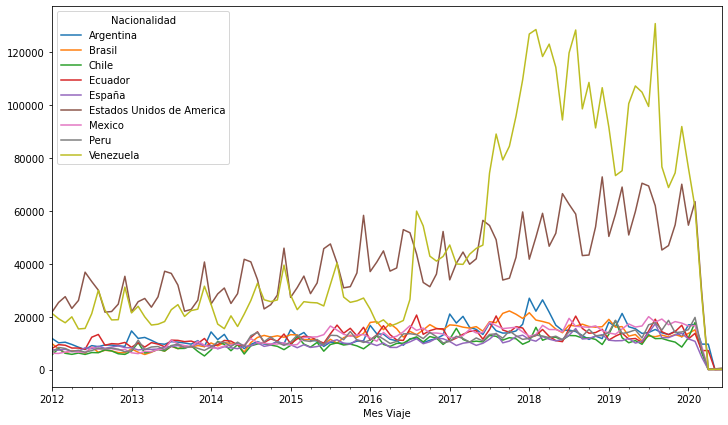

In [493]:
# What's the total amount of people that has been entering colombian territory by each country
visitors = entries[entries.Nacionalidad.isin(most_visitors.index)]
visitors.groupby(['Mes Viaje', 'Nacionalidad'])['Total'].sum().unstack().ffill().plot();

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!